<a href="https://colab.research.google.com/github/paulc00/ML-Intro/blob/master/Linear_Regression_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import numpy for linear algebra operations
import numpy as np

# Import pandas for data manipulation
import pandas as pd  

# Import the functions we'll need from scikit-learn
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [0]:
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target

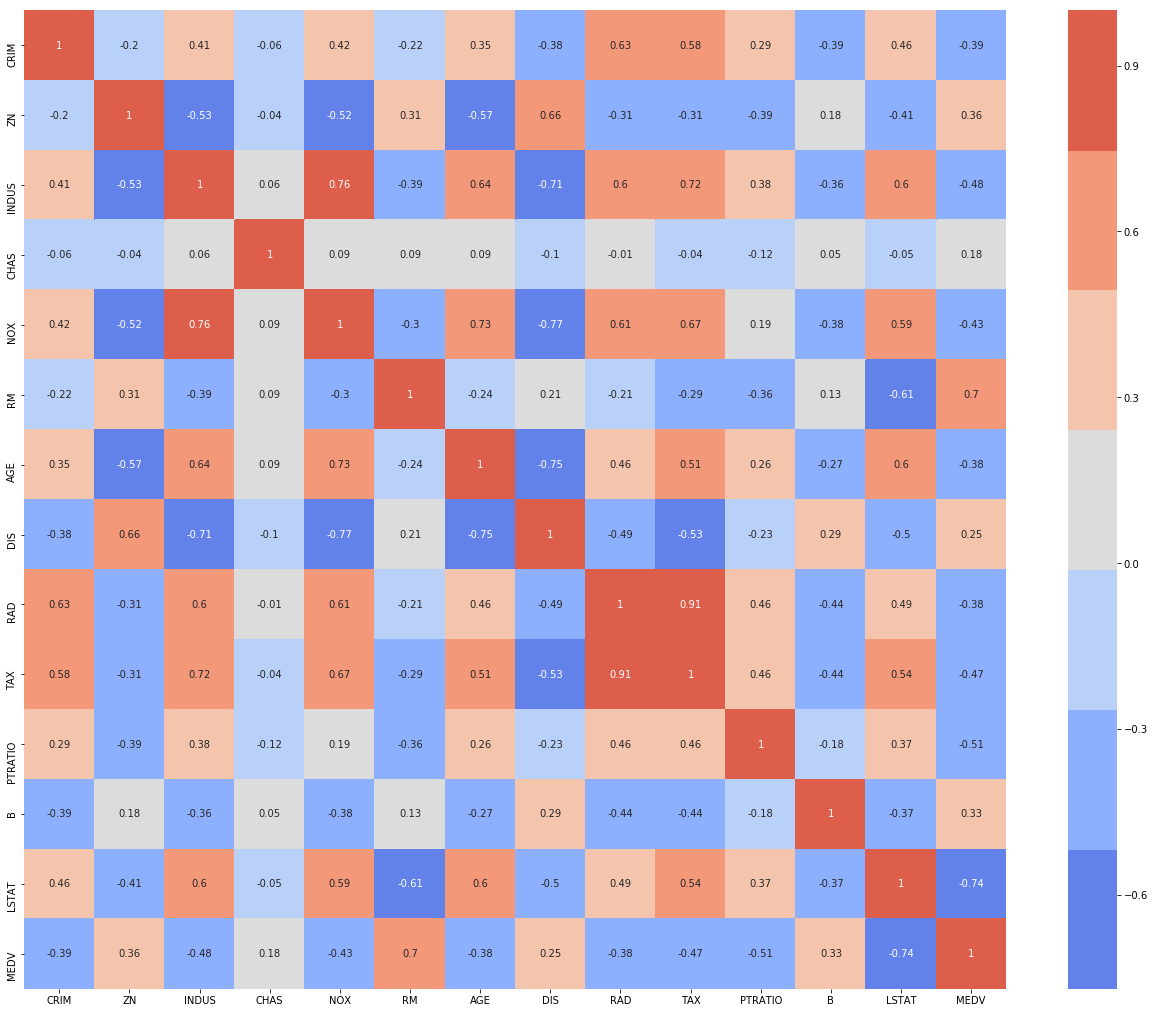

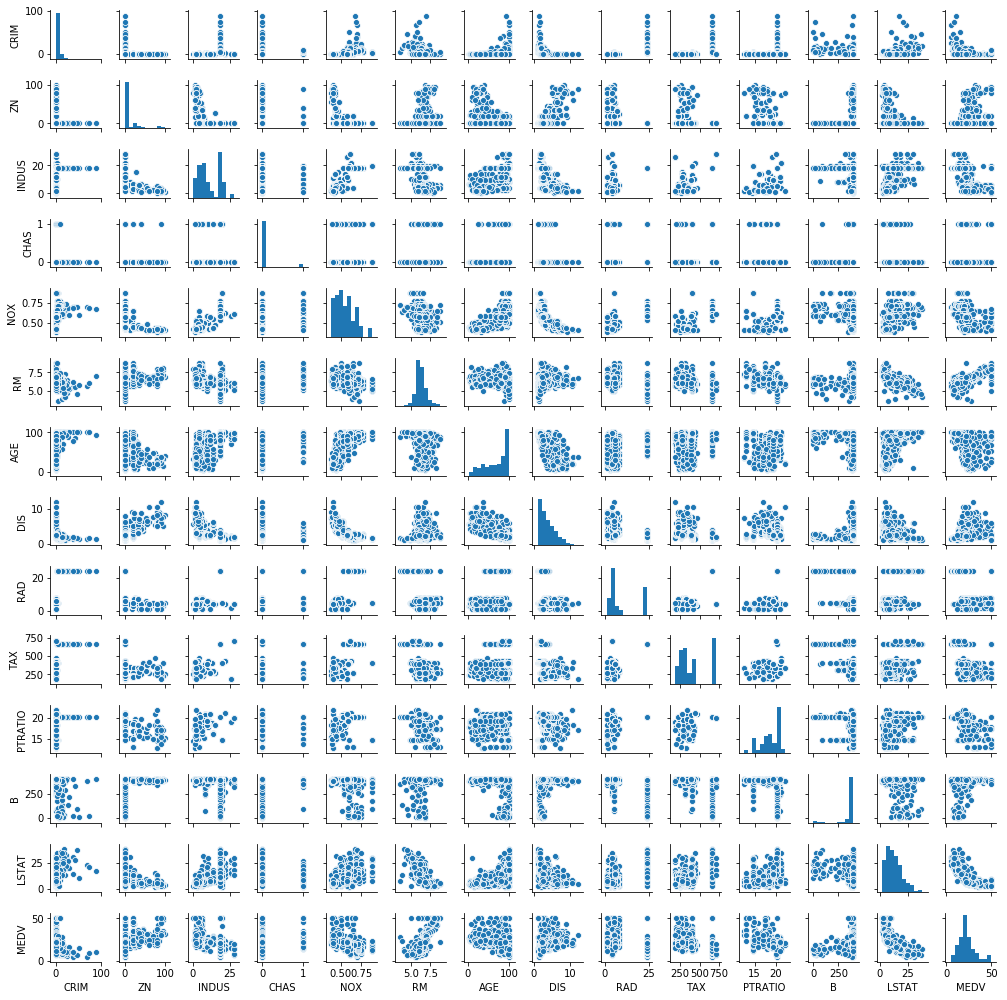

In [62]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
plt.figure(figsize=(22,18))
sns.heatmap(data=correlation_matrix, annot=True, cmap=sns.color_palette("coolwarm", 7))
sns.pairplot(boston, height=1)

In [0]:
# Build our features dataset
X = pd.DataFrame(np.column_stack((boston['LSTAT'], boston['RM'])), columns = ['LSTAT','RM'])

# Specify our target vector (it's a vector because there's only one column)
y = boston['MEDV']

In [0]:
# Split our data into training and testing sets using random sampling with 20% of the data as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)  # random_state will cause the same random sequence to be generated every time

In [6]:
# We'll use a linear regression model
linear_model = LinearRegression()

# Fit our linear regression model to our training data i.e. train the model
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
# Calculate some results against our test set to determine how well our trained model works

# model evaluation for training set
y_train_predict = linear_model.predict(X_train)
rmse_train = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2_train = r2_score(y_train, y_train_predict)

print("Model performance for TRAINING set")
print("----------------------------------")
print(f'RMSE is {rmse_train:.3f}                      [lower is better]')
print(f'R² score is {r2_train*100:.2f}%                 [higher is better]')
print("\n")

# model evaluation for testing set
y_test_predict = linear_model.predict(X_test)
rmse_test = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2_test = r2_score(y_test, y_test_predict)

print("Model performance for TEST set")
print("------------------------------")
print(f'RMSE is {rmse_test:.3f}')
print(f'R² score is {r2_test*100:.2f}%')

Model performance for TRAINING set
----------------------------------
RMSE is 5.637                      [lower is better]
R² score is 63.01%                 [higher is better]


Model performance for TEST set
------------------------------
RMSE is 5.137
R² score is 66.29%


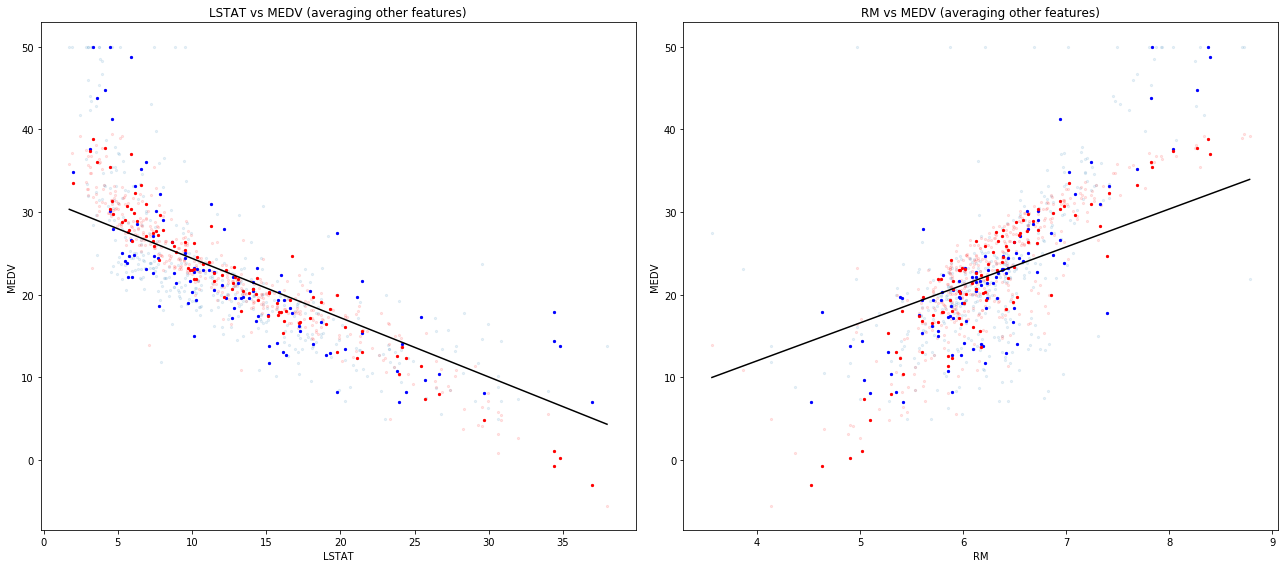

In [79]:
plt.figure(figsize=(18,8))
features = list(X)
for i, feature in enumerate(features, 1):
  plt.subplot(1, len(features) , i)
  x = X_train.loc[:, feature]
  plt.scatter(x, y_train, marker='o', s=5, alpha=0.1)
  plt.scatter(x, y_train_predict, s=5, c='r', alpha=0.1)

  x = X_test.loc[:, feature]
  plt.scatter(x, y_test, marker='o', s=5, c='b')
  plt.scatter(x, y_test_predict, s=5, c='r')
  x = X.loc[:, feature]
  feature_range = [[x.min() if feature_1 == feature else X.mean()[feature_1] for feature_1 in features], [x.max() if feature_1 == feature else X.mean()[feature_1] for feature_1 in features]]
  y_pred_range = linear_model.predict(feature_range)
  plt.plot([[x.min()], [x.max()]], y_pred_range, c='k')

  plt.title(f'{feature} vs MEDV (averaging other features)')
  plt.xlabel(feature)
  plt.ylabel('MEDV')
# Reduce the space between subplots
plt.tight_layout()
plt.show()

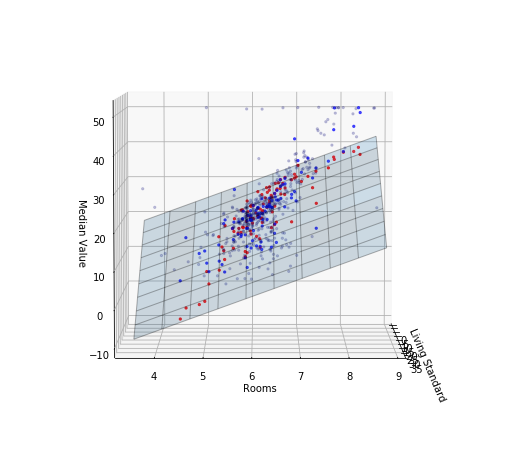

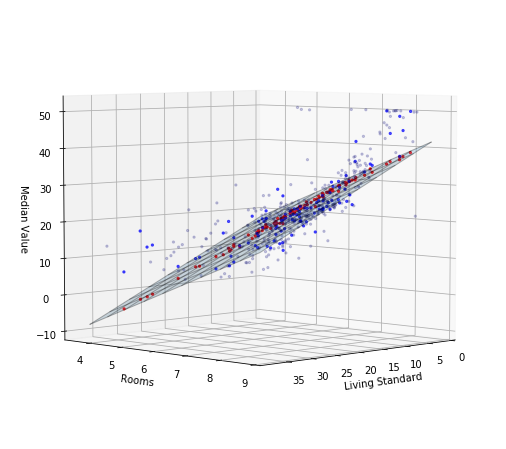

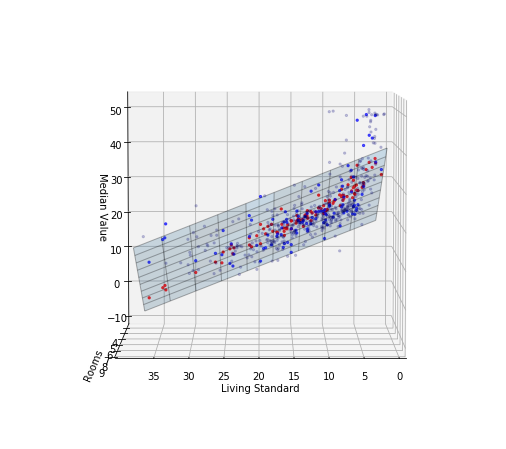

In [87]:
from mpl_toolkits.mplot3d import Axes3D


x1_surf = np.linspace(X['LSTAT'].min(), X['LSTAT'].max(), 10)                # generate a mesh
x2_surf = np.linspace(X['RM'].min(), X['RM'].max(), 10)
x1_surf, x2_surf = np.meshgrid(x1_surf, x2_surf)

exog = pd.core.frame.DataFrame({'LSTAT': x1_surf.ravel(), 'RM': x2_surf.ravel()})
out = linear_model.predict(exog)
for i in range(1, 4):
  fig = plt.figure(figsize=(30,8))
  ax = fig.add_subplot(1, 3, i, projection='3d')
  ax.view_init(elev=5, azim=45 * (i-1))

  ax.plot_surface(x1_surf, x2_surf,
                  out.reshape(x1_surf.shape),
                  # rstride=1,
                  # cstride=1,
                  color=None,
                  alpha = 0.2)
  ax.plot_wireframe(x1_surf, x2_surf,
                  out.reshape(x1_surf.shape), color='black', alpha=0.3, lw=1)
  ax.scatter(X['LSTAT'], X['RM'], y,
            c='blue',
            marker='o',
            s=5,
            alpha=0.1)
  ax.scatter(X_train['LSTAT'], X_train['RM'], y_train, c='k', s=5, alpha=0.1)
  ax.scatter(X_test['LSTAT'], X_test['RM'], y_test, c='b', s=5, alpha=0.6)
  ax.scatter(X_test['LSTAT'], X_test['RM'], y_test_predict, c='r', s=5, alpha=0.8)

  ax.set_xlabel('Living Standard')
  ax.set_ylabel('Rooms')
  ax.set_zlabel('Median Value')

plt.show()